<a href="https://colab.research.google.com/github/marciadartup/Portif-lio/blob/master/M%C3%B3dulo_04_Analisando_sua_Caixa_de_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Analisando sua Caixa de Emails

Todos os dias recebemos uma grande quantidade de e-mails que nos trazem variados tipos de informações em diversos formatos. Mas como organizar, entender e trabalhar com todos esses dados disponíveis?


<center><img width="50%" src="https://image.freepik.com/free-vector/mail-sent-concept-illustration_114360-168.jpg"></center>

Nessa aula, veremos como acessar, baixar e trabalhar com os dados que recebemos por e-mail.

## Coletando os Dados

Antes de começar, você vai precisar acessar sua conta do **Gmail**. Faça o login no mesmo navegador que você está utilizando agora, pois será necessário se conectar à sua conta.

Quando você estiver logado, clique [aqui](https://takeout.google.com/settings/takeout).

Na página do Google Takeout, ele te oferece diversas opções de dados de serviços Google a serem baixados. Entretanto, aqui estamos focados em e-mails, portanto, vamos **Desmarcar Tudo**.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.01%20AM.png?raw=true"></center>

Assim, ele irá fazer o download apenas do que nós selecionarmos. Vamos selecionar **apenas o Gmail**, e seguir para o próximo passo, onde vamos configurar as opções de download.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.17%20AM.png?raw=true"></center>

No próximo passo, vamos selecionar que o link de download seja enviado por e-mail, que os dados sejam exportados apenas uma vez,  vamos selecionar o formato `.zip`, e selecionar o tamanho do arquivo para 50GB.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.19.50%20AM.png?raw=true"></center>

Atenção! Os dados podem demorar bastante para serem enviados, a depender do tamanho do arquivo que será gerado, caso sua caixa esteja muito cheia. É importante entender que o processo pode demorar. Mais dados nos ajudam a ter uma noção melhor do que está acontecendo, mas, caso prefira, é possível coletar um volume menor de dados.

O processo pode levar várias horas, e até mais de um dia. Tenha paciência, e assim que receber e baixar, dê seguimento ao projeto por aqui.

In [1]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mailbox
import re
import pytz
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregando os Dados
Após fazer o download do arquivo .zip, faça o upload do mesmo para o Colab através da aba de arquivos à esquerda do navegador. Uma vez lá, copie o caminho, e use esse endereço para carregar o arquivo como fizemos abaixo.

In [4]:
!unzip /content/takeout-20200925T101207Z-001.zip

Archive:  /content/takeout-20200925T101207Z-001.zip
  inflating: Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox  
  inflating: Takeout/navegador_arquivo.html  


Agora que fizemos o upload e descompactamos o arquivo, é hora de carregar os dados do nosso e-mail. Para isso, vamos utilizar a biblioteca `mailbox` para carregar o arquivo do tipo `mbox` contido no nosso arquivo zip.

In [5]:
# carregando o arquivo
mbox = mailbox.mbox("/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox")

In [6]:
# visualizando as chaves
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'Received',
 'Received',
 'Content-Type',
 'Date',
 'From',
 'Mime-Version',
 'Precedence',
 'Reply-to',
 'Subject',
 'To',
 'Message-ID',
 'X-SG-EID',
 'X-SG-ID',
 'X-Feedback-ID']

## Criando o Data Frame
Para que possamos trabalhar melhor com esses dados, vamos extrair os mesmos, salvá-los em um dicionário e construir com ele um data frame.

Para isso, vamos criar um dicionário, onde as chaves são as informações que queremos puxar, e os valores serão as entradas de cada e-mail, para cada variável de interesse.

Criaremos um loop for, para percorrer nosso arqvuio mbox, e pra cada mensagem, pegar as informações e adicioná-las aoo nosso dicionário.

In [7]:
# criando o dicionário
email_dict = {
    'date': [],
    'from': [],
    'to': [],
    'subject': [],
    'labels': []
}

# coletando os dados
for message in mbox:
    email_dict['date'].append(message['date'])
    email_dict['from'].append(message['from'])
    email_dict['to'].append(message['to'])
    email_dict['subject'].append(message['subject'])
    email_dict['labels'].append(message['X-Gmail-Labels'])

In [8]:
# transformando em dataframe
df = pd.DataFrame(email_dict)

In [9]:
# visualizando as primeiras entradas
df.head()

,date,from,to,subject,labels
0,"Sun, 20 Sep 2020 15:27:44 +0000 (UTC)","""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,"Mon, 21 Sep 2020 15:43:11 -0700",Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,"=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
2,"Thu, 17 Sep 2020 15:21:05 +0000 (UTC)","""James Clear"" <james@jamesclear.com>",""""" <marcia.darts@gmail.com>","3-2-1: On talent, qualities of a great career,...","=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
3,"Sat, 19 Sep 2020 11:03:32 +0000",=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,=?utf-8?Q?marcia.darts?= <marcia.darts@gmail.com>,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,"Sun, 20 Sep 2020 11:50:00 +0000 (UTC)","""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


In [10]:
# verificando os tipos
df.dtypes

date       object
from       object
to         object
subject    object
labels     object
dtype: object

Ao verificar os tipos das variáveis, já conseguimos perceber que precisaremos trablhar a coluna `date`. Essa coluna nos traz informações de data, mas está em formato `object`, é uma string.

Portanto, vamos converter para o formato `datetime`. Entretanto, essa coluna nos trás informácões de Time Zones, e precisamos passar o parâmetro `utc=True`, para que a conversão possa ser feita corretamente.

In [11]:
# convertendo date para datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

In [12]:
# verificando as primeiras entradas
df.head()

,date,from,to,subject,labels
0,2020-09-20 15:27:44+00:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,2020-09-21 22:43:11+00:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,"=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
2,2020-09-17 15:21:05+00:00,"""James Clear"" <james@jamesclear.com>",""""" <marcia.darts@gmail.com>","3-2-1: On talent, qualities of a great career,...","=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
3,2020-09-19 11:03:32+00:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,=?utf-8?Q?marcia.darts?= <marcia.darts@gmail.com>,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,2020-09-20 11:50:00+00:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


Excelente! Já temos nossos dados no tipo que precisamos. Entretanto, ainda existe uma transformação que precisa ser feita. 

Precisamos que a informação de *time zone* esteja condizente com a Time Zone que nos encontramos. Para isso, aplicaremos uma função *lambda* para aplicar às entradas o método timezone da biblioteca `pytz` para que possamos ter a informação correta de *time zone*.

In [13]:
# transformando time zone
df["date"] = df["date"].apply(lambda x: x.astimezone(pytz.timezone("America/Sao_Paulo")))

In [14]:
# verificando o resultado
df.head()

,date,from,to,subject,labels
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,"=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",""""" <marcia.darts@gmail.com>","3-2-1: On talent, qualities of a great career,...","=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,=?utf-8?Q?marcia.darts?= <marcia.darts@gmail.com>,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


Com os dados nos formatos e tipos que precisamos, é hora de continuar a limpeza dos nossos dados.

Abaixo, ao verificamos a presença de dados ausentes. Como a quantidade é pequena, vamos excluir essas linhas.

In [15]:
# verificando entradas vazias
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

In [16]:
# excluindo as linhas
df.dropna(how='any', inplace=True)

In [17]:
# verificando novamente
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

## Limpeza de Strings

Ao verificar os dados acima, conseguimos perceber que temos algumas entradas bastante confusas, onde o entendimento do que, de fato, é informação relevante fica comprometido.

<center><img width="50%" src="https://image.freepik.com/free-photo/housekeeping-concept-with-hand-holding-cloth_23-2147699396.jpg"></center>

Por isso, é importante que façamos uma limpeza dessas entradas, utilizando as técnicas de manipulação de strings que aprendemos nos módulos anteriores. 

A primeira coisa que vamos fazer é limpar os e-mails.

Para isso, vamos criar uma função para retirar tudo aquilo que não faz parte do endereço de e-mail, e aplicar a mesma nas colunas `to` e `from`.

In [18]:
# criando a função
def extrair_email(string_email):
    email = re.findall(r'<(.+?)>', string_email)
    if email:
        return email[0]
    else:
        return string_email

In [19]:
# aplicando a função
df['to'] = df['to'].apply(extrair_email)
df['from'] = df['from'].apply(extrair_email)

TypeError: ignored

In [20]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,"=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...","=?UTF-8?Q?Caixa_de_entrada,Importante,A?=\r\n ..."
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


Agora, iremos fazer um processo parecido para limpar a coluna `label`.

Criaremos uma função que retire as informações desnecessárias, divida os itens por vírgula, e retorne apenas o primeiro item, que é o item de interesse para nós.

In [21]:
# criando a função
def extrair_label(string_labels):
    return string_labels.replace("=?UTF-8?Q?", "").split(",")[0]

In [22]:
# aplicando a função
df["labels"] = df["labels"].apply(extrair_label)

In [23]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,Caixa_de_entrada
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,Caixa_de_entrada
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...",Caixa_de_entrada
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,Caixa_de_entrada
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,Caixa_de_entrada


## Análise Exploratória

Agora que nossos dados foram adquiridos, carregados e limpos, eles estão prontos para serem analisados!

<center><img width="50%" src="https://image.freepik.com/free-photo/business-presentation-laptop-screen_53876-13516.jpg"></center>

A parte que mais demanda nosso tempo e atenção é a Análise Exploratória, pois é aqui que vamos transformar dados em informação, encontrar isights que farão a diferença em nosso projetos.

A primeira análise que faremos será em relação aos endereços que nos enviam e-mail. Qual foi o endereço que mais me enviou e-mails?

In [24]:
# verificando endereços que mais enviaram e-mail para minha caixa entrada
df[df["labels"] == "Caixa_de_entrada"]["from"].value_counts()[0:5]

=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tributario.com.br>    29
"SESCON-MG" <faleconosco@sescon-mg.com.br>                    23
"Medium Daily Digest" <noreply@medium.com>                    22
edX <news@edx.org>                                            17
"Dan at Real Python" <info@realpython.com>                    12
Name: from, dtype: int64

Outro insight interessante é descobrir que dia da semana a recebemos mais e-mail.

Usando Python e Pandas, vamos criar uma nova coluna, que indica em que dia da semana cada e-mail foi enviado.

In [25]:
df.head()

,date,from,to,subject,labels
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,Caixa_de_entrada
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,Caixa_de_entrada
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...",Caixa_de_entrada
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,Caixa_de_entrada
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,Caixa_de_entrada


In [26]:
# criando uma variávei de dia da semana
df["weekday"] = df["date"].dt.weekday

In [27]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,Caixa_de_entrada,6
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,Caixa_de_entrada,0
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...",Caixa_de_entrada,3
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,Caixa_de_entrada,5
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,Caixa_de_entrada,6


Com a coluna criada, vamos transformar esses números em uma informação mais fácil de digerir e interpretar.

A transformação que fizemos retorna Segunda-Feira como o primeiro dia, portanto, o dia associado ao valor `0`, é Segunda-Feira, e assim sucessivamente.

Vamos criar um dicionário, onde associaremos para as chaves, valores em formato de string para os dias da semana, e transformar nossa coluna com esse dicionário.

In [28]:
# criando dicionário
dias_semana = {0:"Segunda", 1:"Terça", 2:"Quarta",3:"Quinta", 4:"Sexta", 5:"Sábado", 6:"Domingo"}

# transformando a coluna
df["weekday"] = df["weekday"].replace(dias_semana)

In [29]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,Caixa_de_entrada,Domingo
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,Caixa_de_entrada,Segunda
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...",Caixa_de_entrada,Quinta
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,Caixa_de_entrada,Sábado
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,Caixa_de_entrada,Domingo


Agora que temos todas as informações necessárias, podemos usar a biblioteca `seaborn` para plotar um `countplot` e nos mostrar em qual dia da semana recebemos mais e-mails.

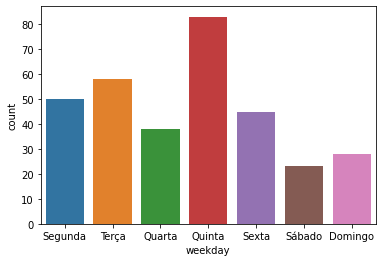

In [30]:
# plotando o countplot
sns.countplot(df["weekday"], order=["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]);

Agora já sabemos que a **Segunda-Feira** traz um volume maior de e-mails do que qualquer outro dia da semana. Mas qual será o horário que mais recebemos e-mails?

Podemos fazer um processo parecido com o que fizemos de dias da semana para criar uma variável que nos indica a hora em que o e-mail foi recebido.

Assim, conseguimos fazer uma análise sememlhante à que fizemos sobre os dias.

In [31]:
# coletando as horas
df["hora"] = df["date"].dt.hour

In [32]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday,hora
0,2020-09-20 12:27:44-03:00,"""SESCON-MG"" <faleconosco@sescon-mg.com.br>",marcia.darts@gmail.com,=?UTF-8?B?Q2ljbG8gUGFsZXN0cmFzIGRlIERpcmVpdG8g...,Caixa_de_entrada,Domingo,12
1,2020-09-21 19:43:11-03:00,Kaggle <noreply@kaggle.com>,marcia.darts@gmail.com,Updated Privacy Policy and Terms,Caixa_de_entrada,Segunda,19
2,2020-09-17 12:21:05-03:00,"""James Clear"" <james@jamesclear.com>",marcia.darts@gmail.com,"3-2-1: On talent, qualities of a great career,...",Caixa_de_entrada,Quinta,12
3,2020-09-19 08:03:32-03:00,=?utf-8?Q?Tribut=C3=A1rio?= <newsletter@tribut...,marcia.darts@gmail.com,=?utf-8?Q?14=20novidades=2C=20destaque=20para=...,Caixa_de_entrada,Sábado,8
4,2020-09-20 08:50:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",marcia.darts@gmail.com,=?UTF-8?B?UmljaGFyZCBGZXlubWFuIG9uIHRoZSBEaWZm...,Caixa_de_entrada,Domingo,8


Pronto! Agora basta plotar um countplot, como fizemos anteriormente.

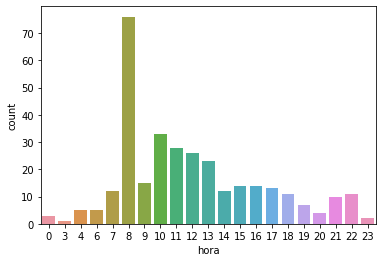

In [33]:
# plotando o gráfico
sns.countplot(df["hora"]);

**One more thing... exportando para Excel!**



In [34]:
# converter para formato de data que o Excel aceita
df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date()) 

In [35]:
df.to_excel("meu_gmail.xlsx", index=False)

## [EXTRA] Word Clouds
<center><img width="50%" src="https://sigmoidal.ai/wp-content/uploads/2019/10/wordcloud_python-2-1024x576-min-1024x576.png"></center>

Aqui, vamos mostrar uma outra possibilidade que trabalhar com palavras nos proporciona. É possível criar `Word Clouds`, ou nuvens de palavras, em tradução livre.

Esse tipo de visualização nos ajuda a entender melhor um conjunto de palavras, e pode ser uma poderosa ferramenta de visualização.

A intenção nesse notebook não é de fazer um tutorial completo sobre wordclouds, e sim apenas mostrar o potencial desse tipo de visualização, e incentivar você a ir além, pensar fora da caixa, e buscar formas diferentes de analisar e apresentar suas análises.

Caso você queira um tutorial completo sobre o que são, como funciona e como implementar word clouds, no Sigmoidal já fizemos um artigo com vídeo mostrando tudo! Basta clicar [aqui](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/) para acessar.



In [38]:
# importando os pacotes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

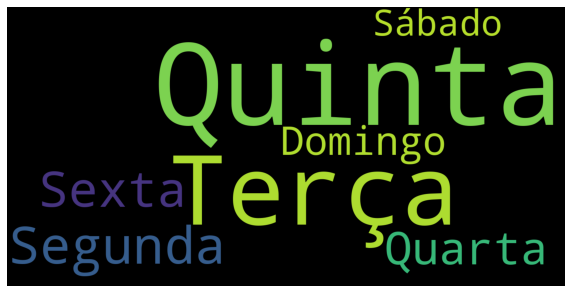

In [40]:
# criando a wordcloud
summary = df['weekday']

all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "ai", "UTF", "_http"], "hotmail", "gmail")
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

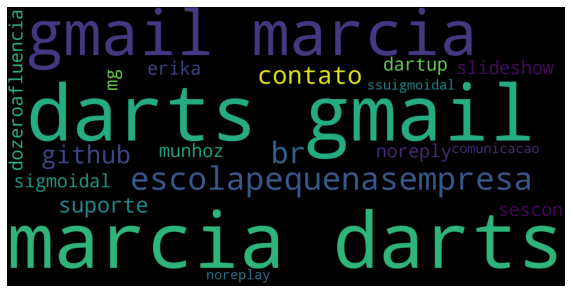

In [42]:
# criando a wordcloud
summary = df ['to']

all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "ai", "UTF", "_http"], "hotmail", "gmail")
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

Aqui, o intuito foi apenas mostrar a possibilidade. Existem muitas coisas que podem ser melhoradas, tratamento mais fino de stopwords, uso de máscaras, muitas possibilidades.

Se você ficou interessado, não deixe de acessar o [tutorial completo](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/).